# Imports

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2
from PIL import Image, ImageEnhance

# Read example

In [15]:
image = io.imread(r"data/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/page0.tif")
image_PIL = Image.fromarray((np.asarray(Image.open(r"data/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/page0.tif")) * 1).astype(np.uint8)).convert('RGB')

# Histogram and image saturation

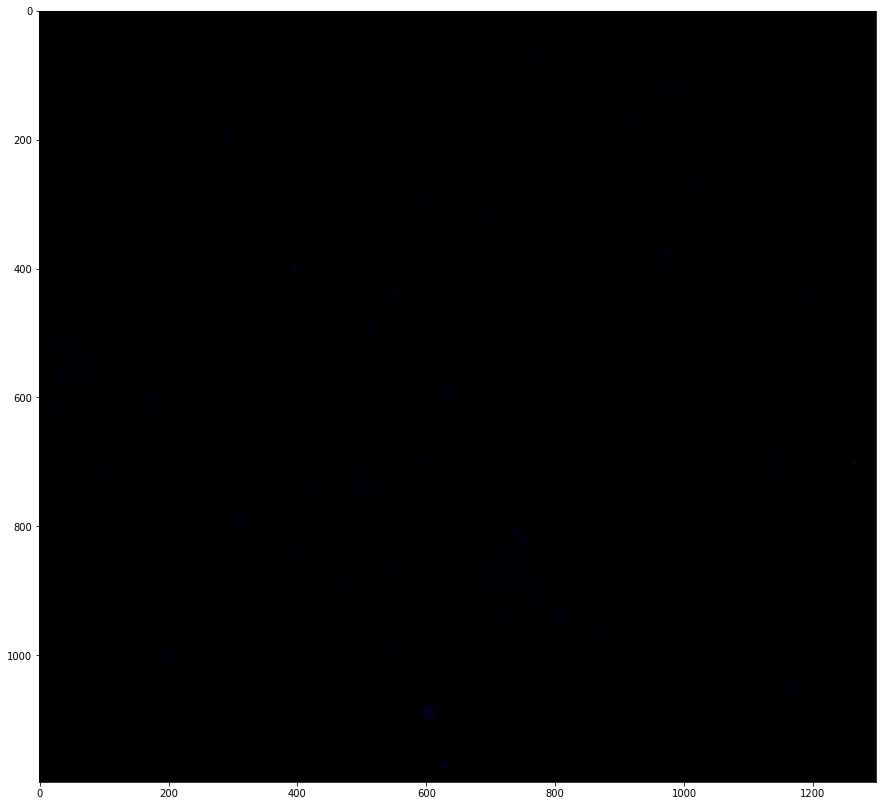

In [16]:
plt.figure(figsize=(15,15))
plt.imshow(image_PIL)

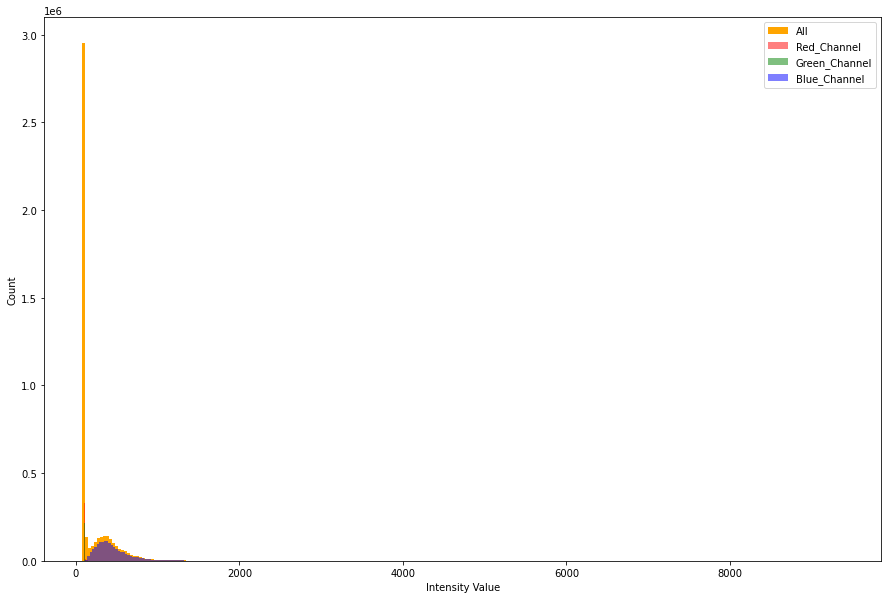

In [17]:
plt.figure(figsize=(15,10))
_ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(image[:, :, 0].ravel(), bins = 5000,  color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['All', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

## Blue channel

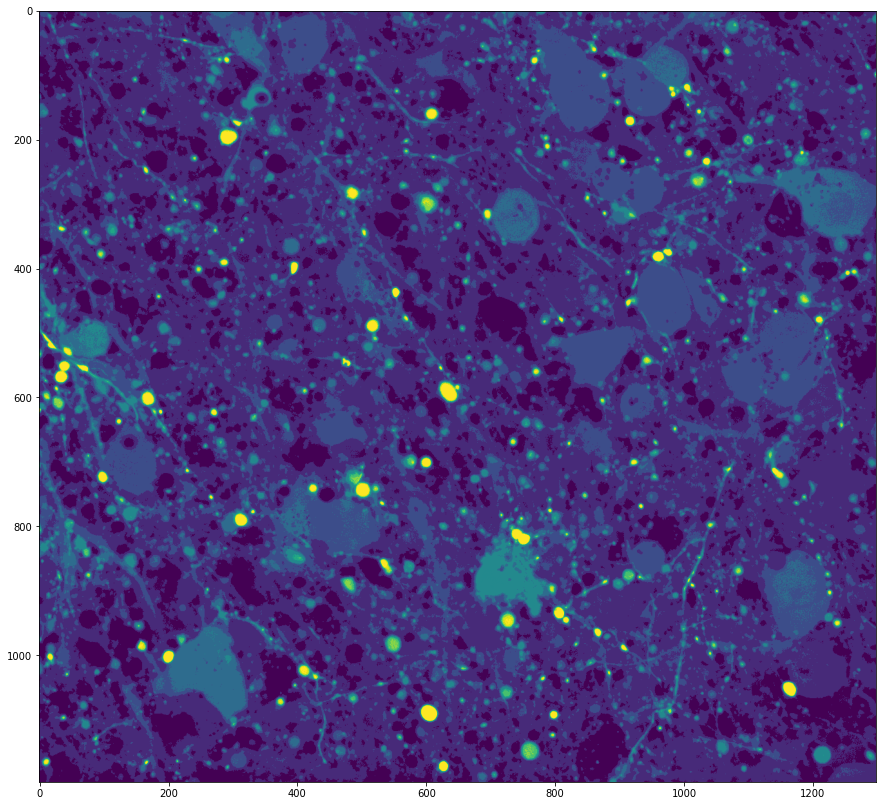

In [21]:
converter = ImageEnhance.Color(image_PIL)
img_blue = converter.enhance(30.0)
plt.figure(figsize=(15,15))
plt.imshow(img_blue.getchannel('B'))

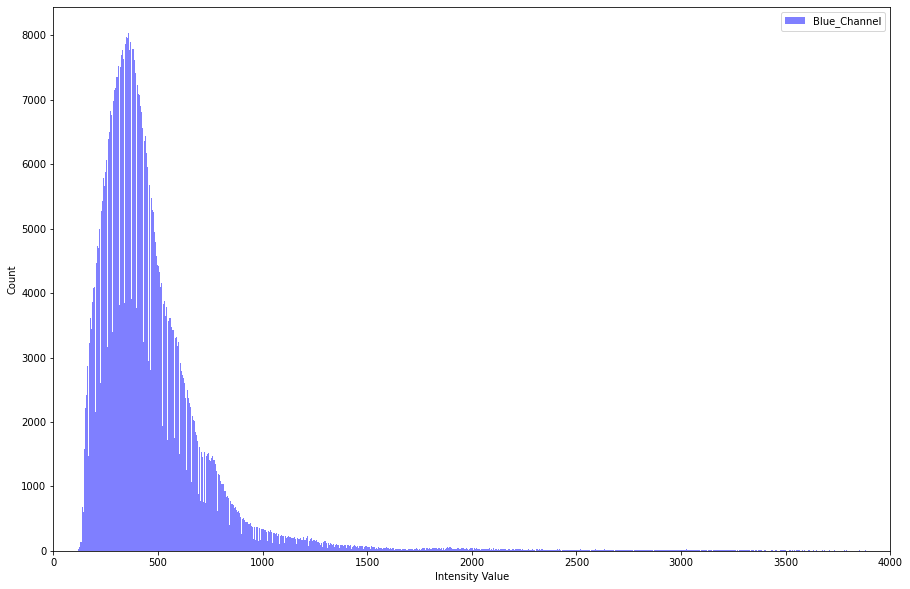

111


In [26]:
plt.figure(figsize=(15,10))
_ = plt.hist(image[:, :, 2].ravel(), bins = 4000, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Blue_Channel'])
plt.xlim(0, 4000)
plt.show()
print(min(image[:, :, 2].ravel()))

## Red channel

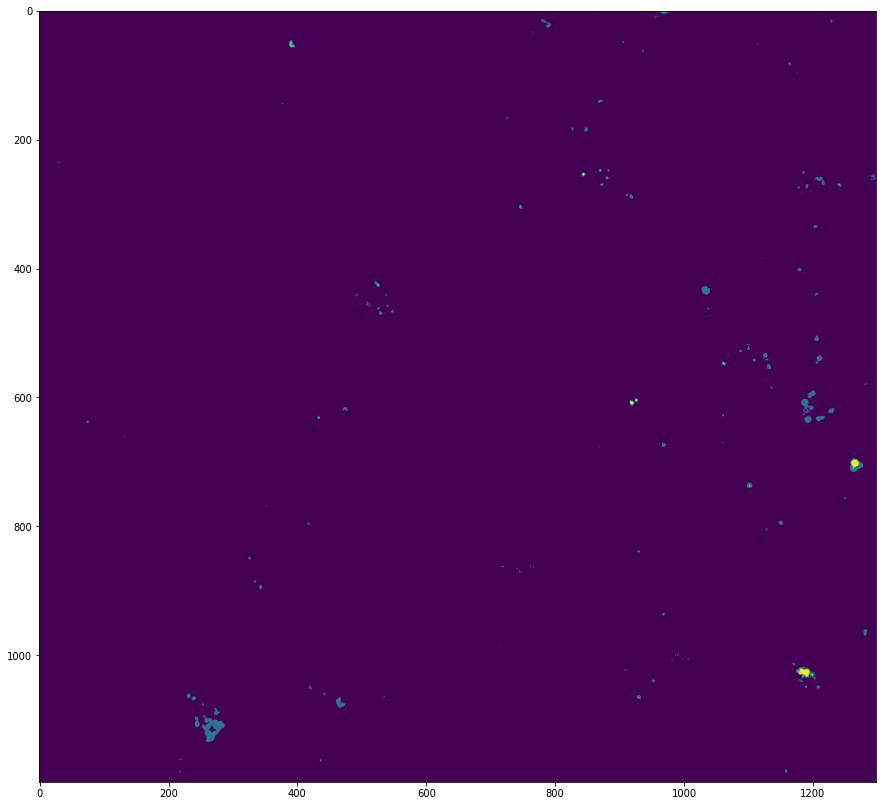

In [38]:
converter = ImageEnhance.Color(image_PIL)
img_blue = converter.enhance(100.0)
plt.figure(figsize=(15,15))
plt.imshow(img_blue.getchannel('R'))

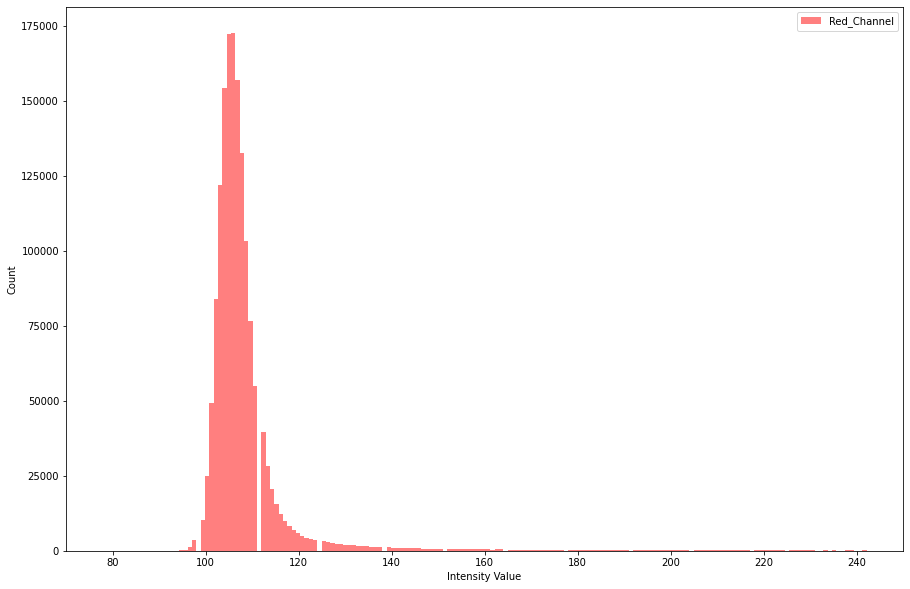

85


In [29]:
plt.figure(figsize=(15,10))
_ = plt.hist(image[:, :, 0].ravel(), bins = 10000, color = 'Red', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel'])
plt.xlim(70, 250)
plt.show()
print(min(image[:, :, 0].ravel()))

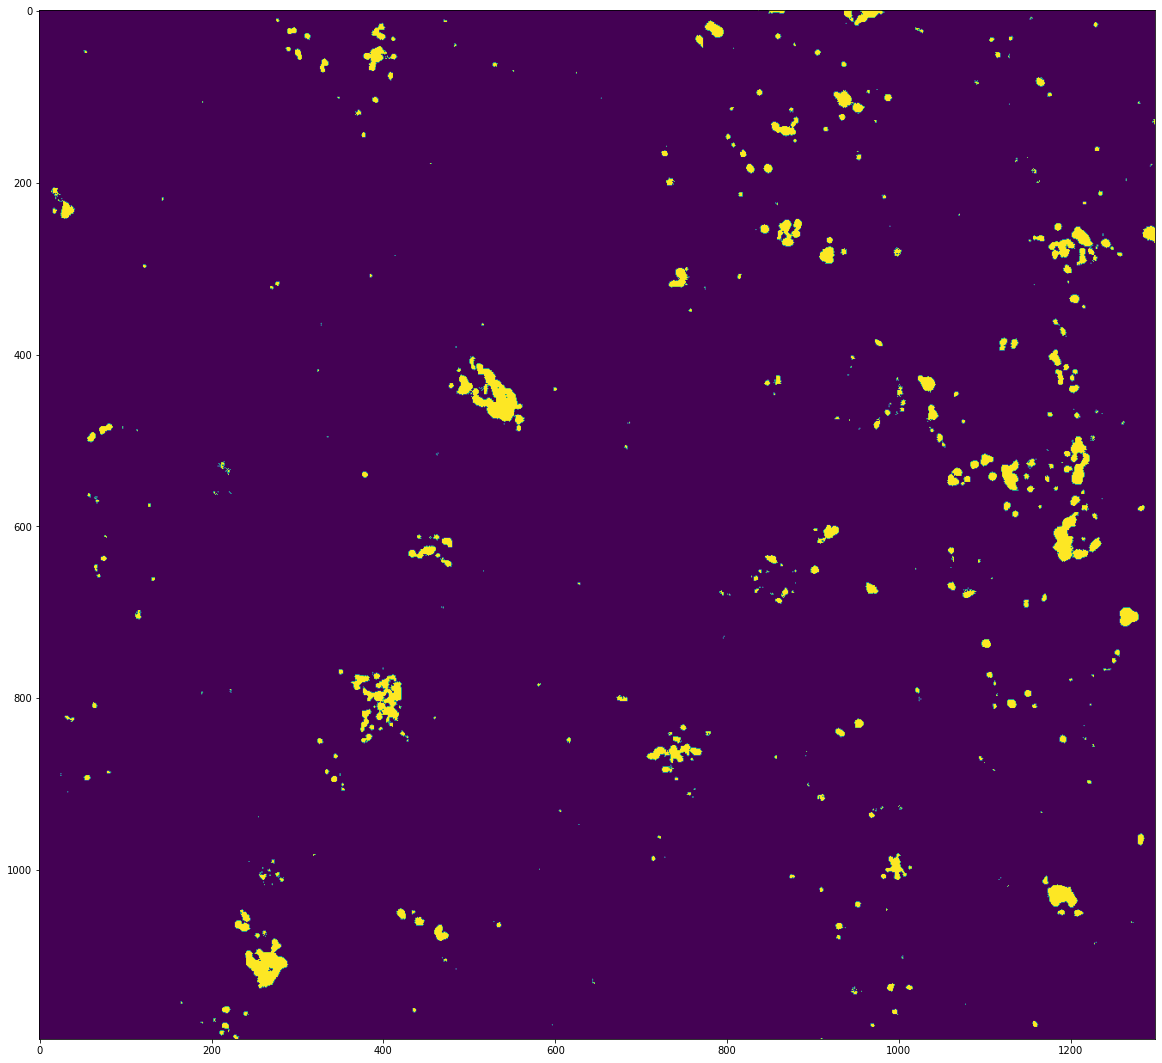

In [46]:
image_masked = (image[:, :, 0] > 163).astype(np.uint8)
plt.figure(figsize=(20,20))
plt.imshow(image_masked)

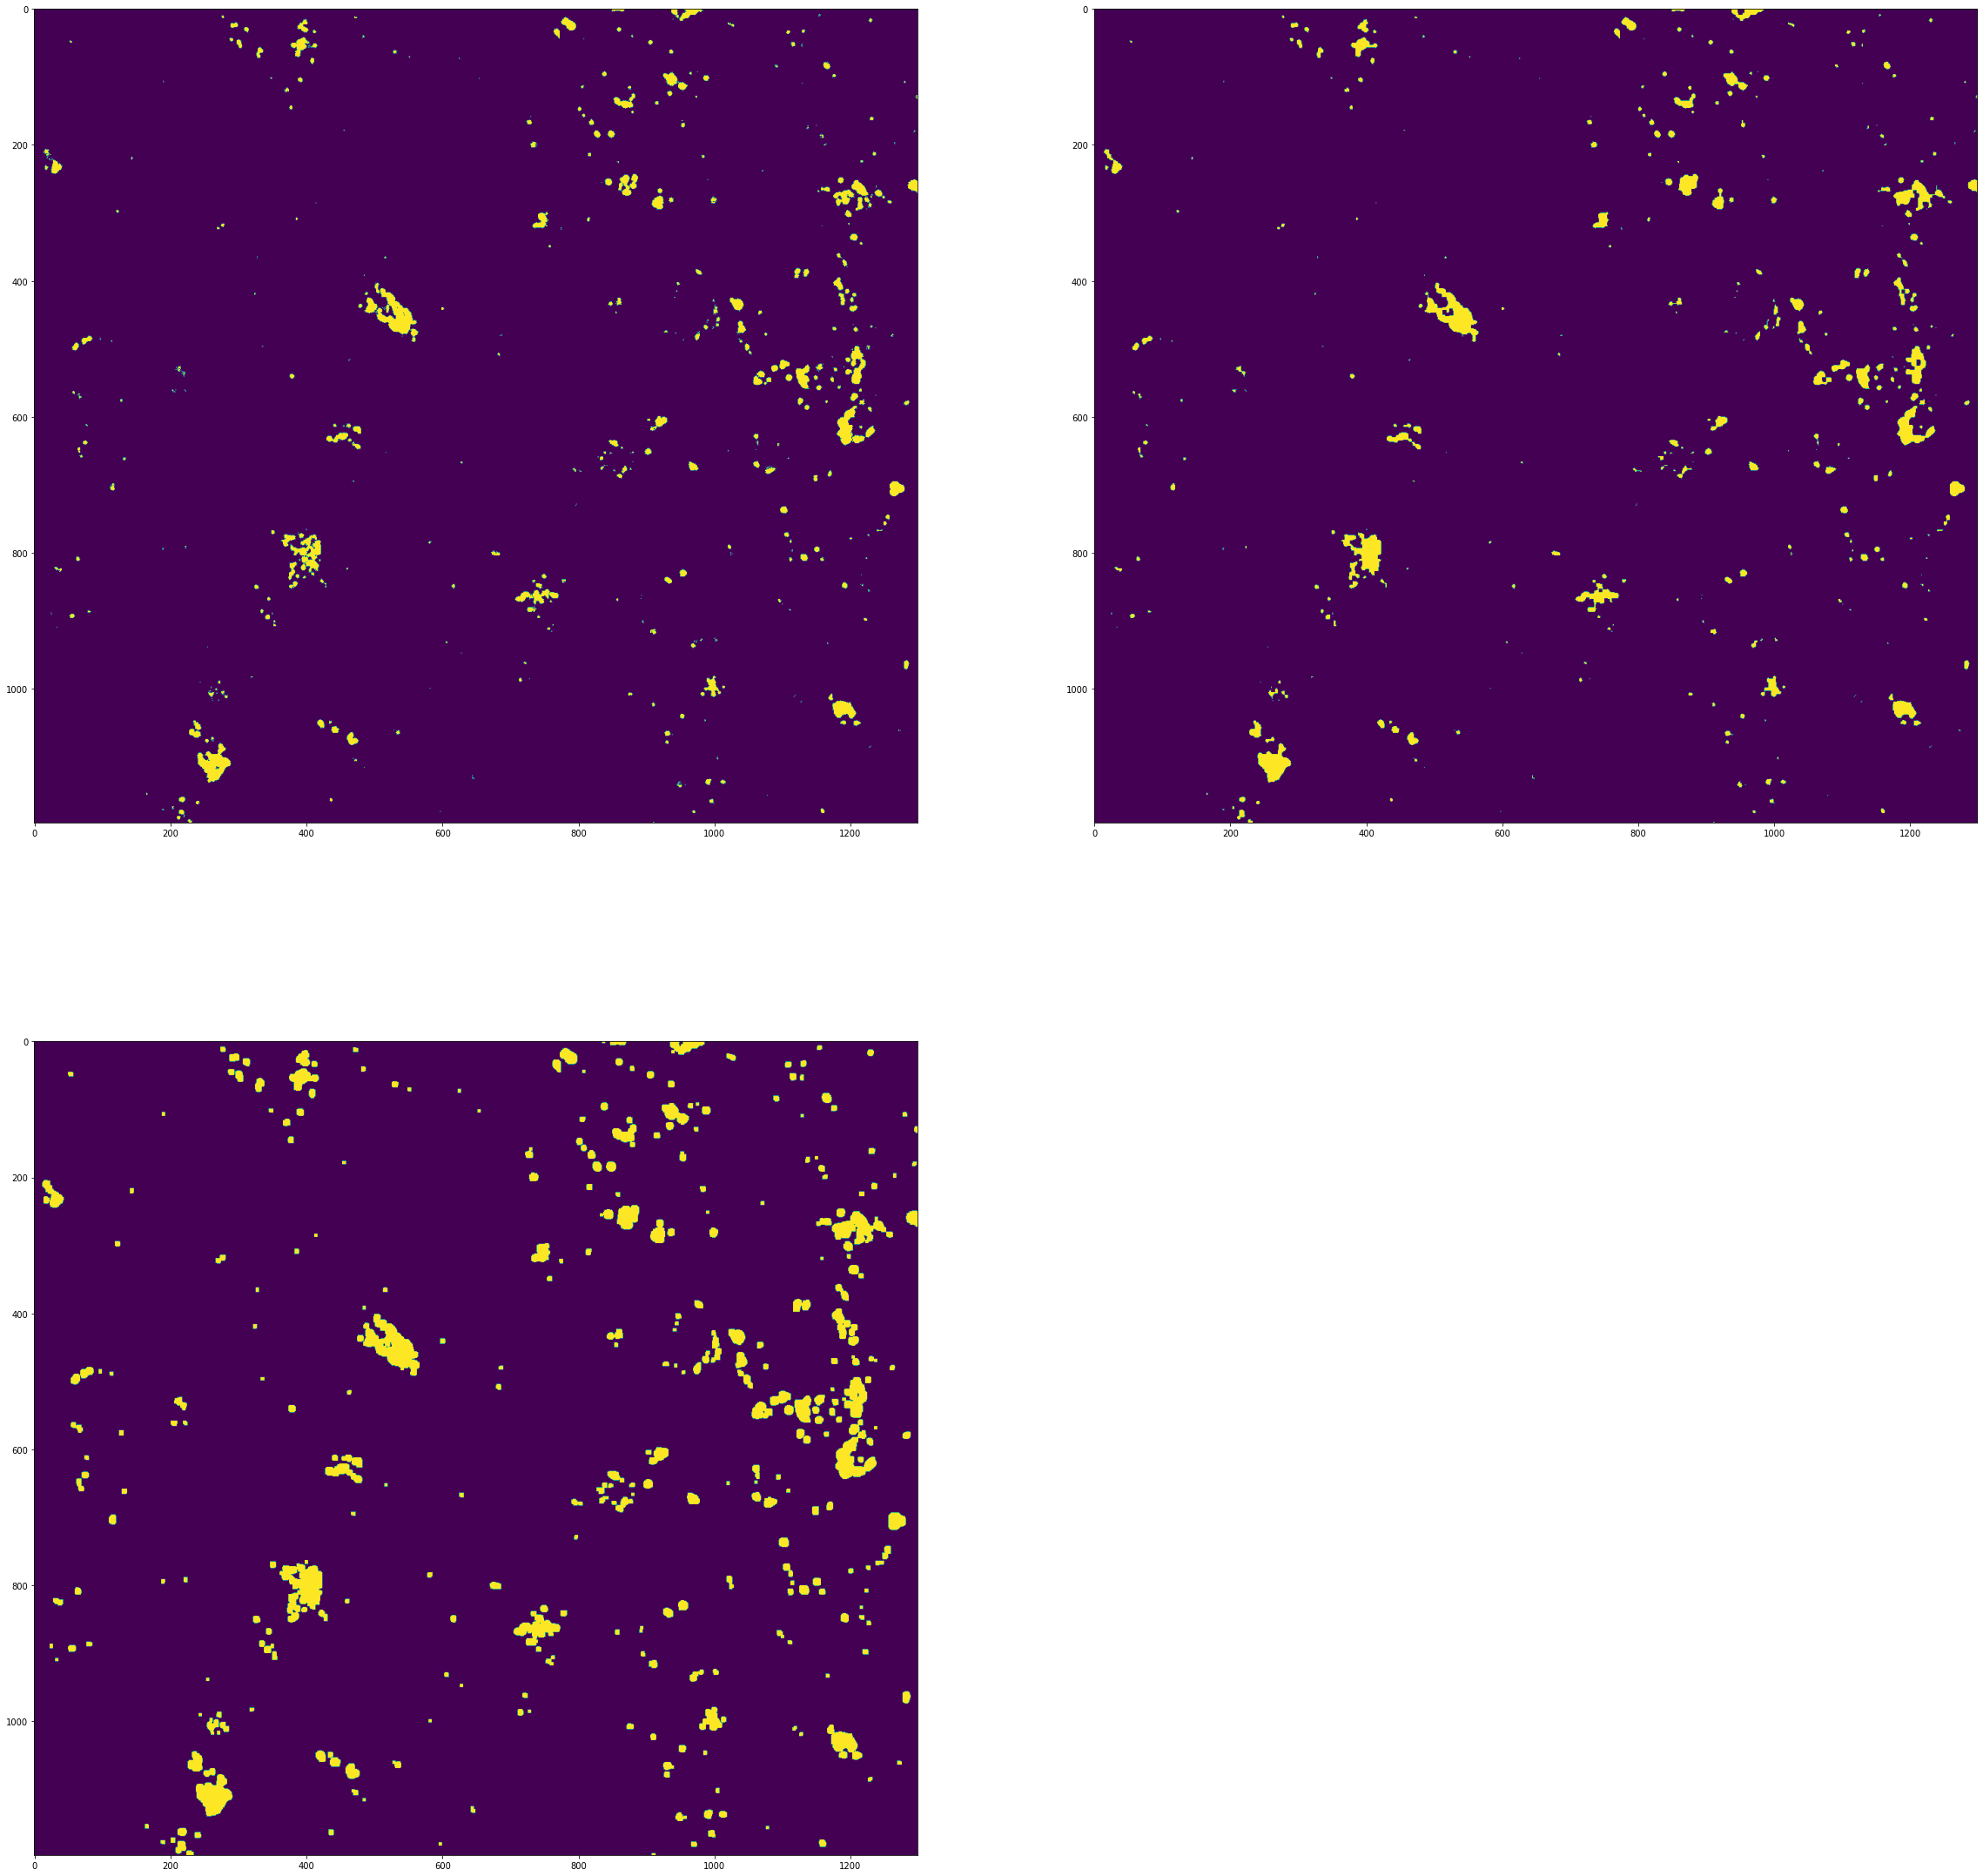

In [56]:
# Taking a matrix of size 5 as the kernel
kernel = np.ones((5, 5), np.uint8)

# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_dilation = cv2.dilate(image_masked,kernel, iterations=1)
img_erosion = cv2.erode(img_dilation, kernel, iterations=1)

plt.figure(figsize=(40,40))
plt.subplot(221)
plt.imshow(image_masked)
plt.subplot(222)
plt.imshow(img_erosion)
plt.subplot(223)
plt.imshow(img_dilation)

In [ ]:
## Green channel

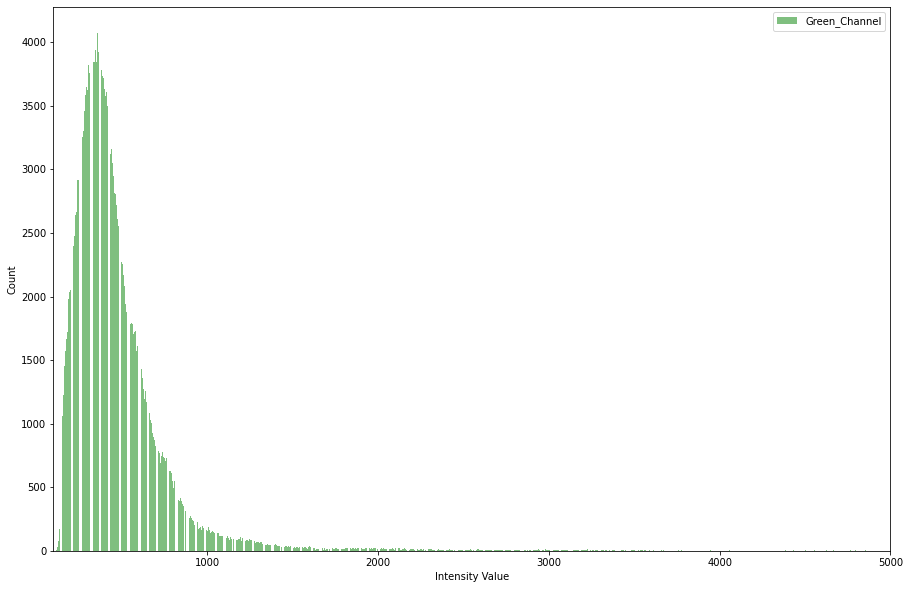

111


In [59]:
plt.figure(figsize=(15,10))
_ = plt.hist(image[:, :, 2].ravel(), bins = 10000, color = 'Green', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Green_Channel'])
plt.xlim(100, 5000)
plt.show()
print(min(image[:, :, 2].ravel()))